In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [3]:
data = pd.read_csv('data_for_lr.csv')

In [5]:
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [7]:
data = data.dropna()

In [9]:
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [11]:
# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

In [13]:
print(train_input)

[[ 24.]
 [ 50.]
 [ 15.]
 [ 38.]
 [ 87.]
 [ 36.]
 [ 12.]
 [ 81.]
 [ 25.]
 [  5.]
 [ 16.]
 [ 16.]
 [ 24.]
 [ 39.]
 [ 54.]
 [ 60.]
 [ 26.]
 [ 73.]
 [ 29.]
 [ 31.]
 [ 68.]
 [ 87.]
 [ 58.]
 [ 54.]
 [ 84.]
 [ 58.]
 [ 49.]
 [ 20.]
 [ 90.]
 [ 48.]
 [  4.]
 [ 25.]
 [ 42.]
 [  0.]
 [ 60.]
 [ 93.]
 [ 39.]
 [  7.]
 [ 21.]
 [ 68.]
 [ 84.]
 [  0.]
 [ 58.]
 [ 19.]
 [ 36.]
 [ 19.]
 [ 59.]
 [ 51.]
 [ 19.]
 [ 33.]
 [ 85.]
 [ 44.]
 [  5.]
 [ 59.]
 [ 14.]
 [  9.]
 [ 75.]
 [ 69.]
 [ 10.]
 [ 17.]
 [ 58.]
 [ 74.]
 [ 21.]
 [ 51.]
 [ 19.]
 [ 50.]
 [ 24.]
 [  0.]
 [ 12.]
 [ 75.]
 [ 21.]
 [ 64.]
 [  5.]
 [ 58.]
 [ 32.]
 [ 41.]
 [  7.]
 [  4.]
 [  5.]
 [ 49.]
 [ 90.]
 [  3.]
 [ 11.]
 [ 32.]
 [ 83.]
 [ 25.]
 [ 83.]
 [ 26.]
 [ 76.]
 [ 95.]
 [ 53.]
 [ 77.]
 [ 42.]
 [ 25.]
 [ 54.]
 [ 55.]
 [  0.]
 [ 73.]
 [ 35.]
 [ 86.]
 [ 90.]
 [ 13.]
 [ 46.]
 [ 46.]
 [ 32.]
 [  8.]
 [ 71.]
 [ 28.]
 [ 24.]
 [ 56.]
 [ 49.]
 [ 79.]
 [ 90.]
 [ 89.]
 [ 41.]
 [ 27.]
 [ 58.]
 [ 26.]
 [ 31.]
 [ 70.]
 [ 71.]
 [ 39.]
 [  7.]
 [ 48.]
 [ 56.]


In [15]:
print(train_output)

[[ 21.54945196]
 [ 47.46446305]
 [ 17.21865634]
 [ 36.58639803]
 [ 87.28898389]
 [ 32.46387493]
 [ 10.78089683]
 [ 80.7633986 ]
 [ 24.61215147]
 [  6.96331907]
 [ 11.23757338]
 [ 13.53290206]
 [ 24.60323899]
 [ 39.40049976]
 [ 48.43753838]
 [ 61.69900319]
 [ 26.92832418]
 [ 70.4052055 ]
 [ 29.34092408]
 [ 25.30895192]
 [ 69.02934339]
 [ 84.99484703]
 [ 57.04310305]
 [ 50.5921991 ]
 [ 83.02772202]
 [ 57.05752706]
 [ 47.95883341]
 [ 24.34226432]
 [ 94.68488281]
 [ 48.03970696]
 [  7.08132338]
 [ 21.99239907]
 [ 42.33151664]
 [  0.32908944]
 [ 61.92303698]
 [ 91.17716423]
 [ 39.45358014]
 [  5.99606961]
 [ 22.59015942]
 [ 61.18044414]
 [ 85.02778957]
 [ -1.28631089]
 [ 61.94273962]
 [ 21.96033347]
 [ 33.66194193]
 [ 17.60946242]
 [ 58.5630564 ]
 [ 52.82390762]
 [ 22.1363481 ]
 [ 35.07467353]
 [ 86.18822311]
 [ 42.63227697]
 [  4.09817744]
 [ 61.2229864 ]
 [ 17.70677576]
 [ 11.85312574]
 [ 80.23051695]
 [ 62.64931741]
 [  9.6168598 ]
 [ 20.02797699]
 [ 61.7510743 ]
 [ 71.61010303]
 [ 23.77

In [17]:
# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)

In [29]:
class LinearRegression: 
    def __init__(self): 
        self.parameters = {} 

    def forward_propagation(self, train_input): 
        m = self.parameters['m'] 
        c = self.parameters['c'] 
        predictions = np.multiply(m, train_input) + c 
        return predictions 

    def cost_function(self, predictions, train_output): 
        cost = np.mean((train_output - predictions) ** 2) 
        return cost 

    def backward_propagation(self, train_input, train_output, predictions): 
        derivatives = {} 
        df = (predictions-train_output) 
        # dm= 2/n * mean of (predictions-actual) * input 
        dm = 2 * np.mean(np.multiply(train_input, df)) 
        # dc = 2/n * mean of (predictions-actual) 
        dc = 2 * np.mean(df) 
        derivatives['dm'] = dm 
        derivatives['dc'] = dc 
        return derivatives 

    def update_parameters(self, derivatives, learning_rate): 
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm'] 
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc'] 

    def train(self, train_input, train_output, learning_rate, iters): 
        # Initialize random parameters 
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        # Initialize loss 
        self.loss = [] 

        # Initialize figure and axis for animation 
        fig, ax = plt.subplots() 
        x_vals = np.linspace(min(train_input), max(train_input), 100) 
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
                        self.parameters['c'], color='red', label='Regression Line') 
        ax.scatter(train_input, train_output, marker='o', 
                color='green', label='Training Data') 

        # Set y-axis limits to exclude negative values 
        ax.set_ylim(0, max(train_output) + 1) 

        def update(frame): 
            # Forward propagation 
            predictions = self.forward_propagation(train_input) 

            # Cost function 
            cost = self.cost_function(predictions, train_output) 

            # Back propagation 
            derivatives = self.backward_propagation( 
                train_input, train_output, predictions) 

            # Update parameters 
            self.update_parameters(derivatives, learning_rate) 

            # Update the regression line 
            line.set_ydata(self.parameters['m'] 
                        * x_vals + self.parameters['c']) 

            # Append loss and print 
            self.loss.append(cost) 
            print("Iteration = {}, Loss = {}".format(frame + 1, cost)) 

            return line, 
        # Create animation 
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True) 

        # Save the animation as a video file (e.g., MP4) 
        ani.save('linear_regression_A.gif', writer='ffmpeg') 

        plt.xlabel('Input') 
        plt.ylabel('Output') 
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show() 

        return self.parameters, self.loss 


In [31]:
linear_reg = LinearRegression()

MovieWriter ffmpeg unavailable; using Pillow instead.


Iteration = 1, Loss = 3634.3929349019363
Iteration = 1, Loss = 14987158.805491393
Iteration = 1, Loss = 61935940638.290276
Iteration = 1, Loss = 255956635626648.34
Iteration = 2, Loss = 1.0577670840940923e+18
Iteration = 3, Loss = 4.3713311102627417e+21
Iteration = 4, Loss = 1.8064974759463329e+25
Iteration = 5, Loss = 7.465536351018536e+28
Iteration = 6, Loss = 3.0852095699266232e+32
Iteration = 7, Loss = 1.274994540622415e+36
Iteration = 8, Loss = 5.269045884152452e+39
Iteration = 9, Loss = 2.1774873260046183e+43
Iteration = 10, Loss = 8.998690007941397e+46
Iteration = 11, Loss = 3.7188010645097365e+50
Iteration = 12, Loss = 1.536832732897139e+54
Iteration = 13, Loss = 6.351119105144878e+57
Iteration = 14, Loss = 2.6246651977340467e+61
Iteration = 15, Loss = 1.0846698489114793e+65
Iteration = 16, Loss = 4.482509548849763e+68
Iteration = 17, Loss = 1.8524431075219365e+72
Iteration = 18, Loss = 7.655411392232466e+75
Iteration = 19, Loss = 3.163677380770983e+79
Iteration = 20, Loss = 1.

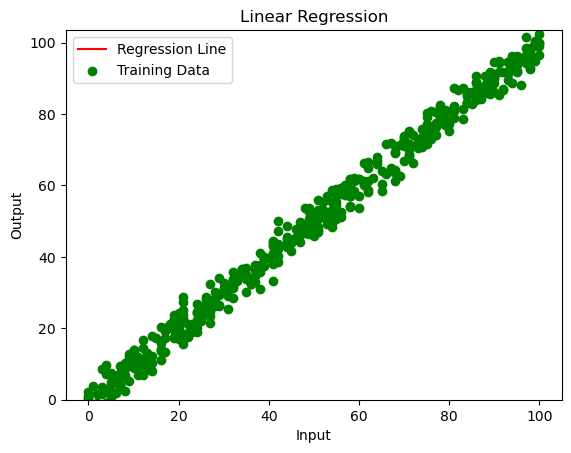

In [35]:
parameters, loss = linear_reg.train(train_input, train_output, 0.01, 20)